In [1]:
%load_ext autoreload

%autoreload 2
from figures_revisited import _out_of_sample
from figures_revisited import *
import pandas as pd
import pickle5 as pickle

from ruspy.model_code.cost_functions import lin_cost, calc_obs_costs
from ruspy.estimation.estimation_transitions import create_transition_matrix
from ruspy.model_code.fix_point_alg import calc_fixp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = _out_of_sample()
df = pd.DataFrame(data=data, columns=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

In [3]:
# Subjective Bayes as mean over all runs
df.mean(axis=0).sort_values(ascending=False)

0.0   -47062.863981
0.1   -47077.045944
0.2   -47090.725469
0.3   -47105.263028
0.4   -47121.423494
0.5   -47139.694150
dtype: float64

In [4]:
# I get the maximin ranking by selecting the minimum performance of each decision rule across runs
(df.min(axis=0)).sort_values(ascending=False)

0.2   -47571.653819
0.1   -47604.028668
0.3   -47618.747278
0.4   -47665.739050
0.5   -47702.875118
0.0   -47876.881216
dtype: float64

In [5]:
# For the maximum regret, I calculate the difference of performance in each run 
# to the best performing decision rule in that run, then take the maximum regret (so minimum value)
# across runs and rank them.
((df.subtract(df.max(axis=1), axis=0)).min(axis=0)).sort_values(ascending=False)

0.2   -196.424171
0.3   -224.700314
0.4   -271.692086
0.5   -308.828155
0.1   -314.843700
0.0   -587.696248
dtype: float64

In [6]:
df = pd.DataFrame(data=[[0, 1, 2, 3], [3, 1, 0, 2], [3, 2, 0, 1]],
                  index=["Subjective Bayes", "Minimax regret", "Maximin"],
                  columns=[0.0, 0.1, 0.2, 0.3])

In [7]:
df

,0.0,0.1,0.2,0.3
Subjective Bayes,0,1,2,3
Minimax regret,3,1,0,2
Maximin,3,2,0,1


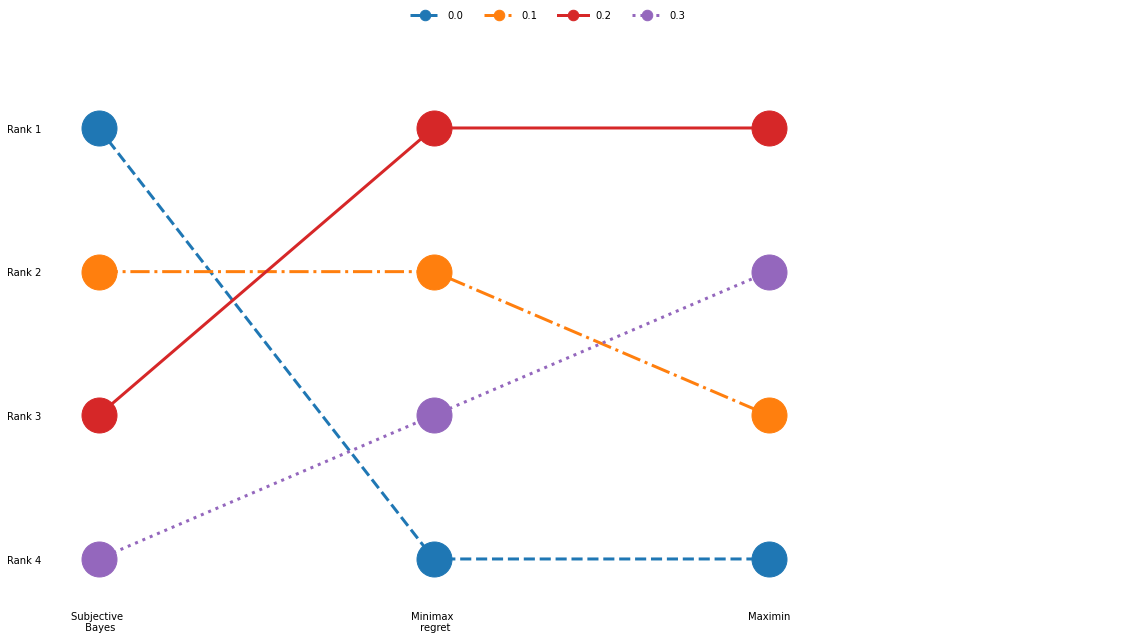

In [8]:
colors = ["tab:blue", "tab:orange", "tab:red", "tab:purple"]
linestyle = ["--", "-.", "-", ":"]
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
for i, col in enumerate(df.columns):
    kwargs = {
        "marker": "o",
        "linestyle": linestyle[i],
        "linewidth": 3,
        "markersize": 35,
        "color": colors[i],
    }

    df[col].plot(**kwargs)
    # Flip y-axis.
    plt.axis([-0.1, 3.1, 3.2, -0.2])

    plt.yticks(
        [0, 1, 2, 3],
        labels=["Rank 1", "Rank 2", "Rank 3", "Rank 4"],
    )
    plt.xticks(
        [0, 1, 2],
        labels=["Subjective \n Bayes", "Minimax \n regret", "Maximin"],
    )
    plt.xlabel("")
    plt.tick_params(axis="both", color="white", pad=20)
    plt.legend(
        markerscale=0.3,
        labelspacing=0.8,
        handlelength=3,
        bbox_to_anchor=(0.45, 1.2),
        loc="upper center",
        ncol=4,
    )

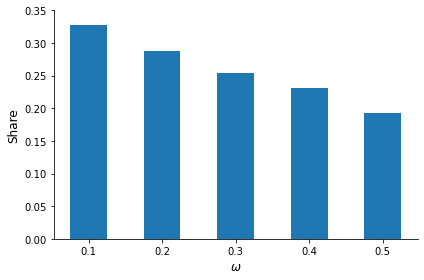

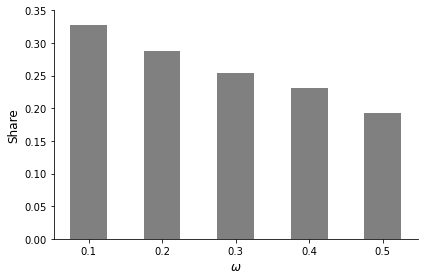

In [9]:
get_robust_performance_revisited(0.05)

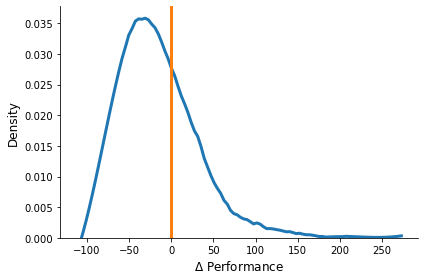

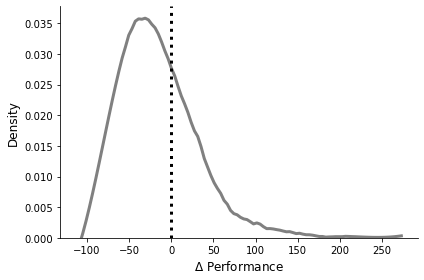

In [10]:
get_out_of_sample_diff(0, 100)

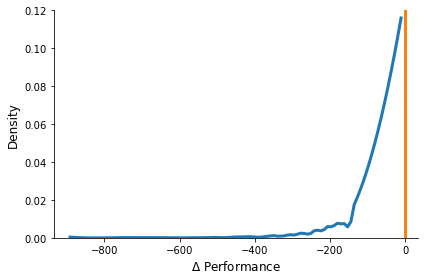

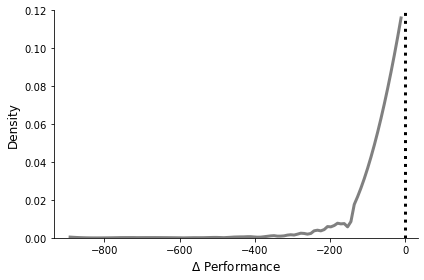

In [11]:
get_out_of_sample_diff_to_true(0, 100)

In [12]:
num_states = 45
disc_fac = 0.9999
cost_scale = 1e-3
cost_params = [50, 400]
obs_costs = calc_obs_costs(num_states, lin_cost, cost_params, cost_scale)#
p = np.loadtxt("../pre_processed_data/parameters/rust_trans_probs.txt")
trans_mat = create_transition_matrix(num_states, p)

In [13]:
ev, _, _ = calc_fixp(trans_mat, obs_costs, disc_fac)

In [14]:
data = _out_of_sample()
data = np.c_[data, np.full(data.shape[0], ev[0])]
df = pd.DataFrame(data=data, columns=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, "true"])
df

,0.0,0.1,0.2,0.3,0.4,0.5,true
0,-47037.146327,-47011.766510,-47004.035561,-47014.179845,-47025.078769,-47029.269514,-46986.062573
1,-47037.031125,-47079.697507,-47103.614926,-47134.969264,-47159.427370,-47184.337853,-46986.062573
2,-47132.172001,-47060.026916,-47029.565964,-47036.119225,-47015.983635,-47009.076003,-46986.062573
3,-47017.014768,-47020.910017,-47036.380933,-47039.964897,-47071.302371,-47087.320588,-46986.062573
4,-47039.178524,-47021.673722,-47012.506744,-47016.741149,-47018.571560,-47033.352081,-46986.062573
...,...,...,...,...,...,...,...
1317,-47032.217490,-47011.891510,-46995.356651,-47019.203910,-47029.867048,-47030.214986,-46986.062573
1318,-47033.436863,-47016.265636,-47009.074519,-47013.064577,-47022.619444,-47029.624837,-46986.062573
1319,-47245.014753,-47333.669707,-47374.921299,-47420.151516,-47454.982599,-47498.982797,-46986.062573
1320,-47056.309209,-47025.064916,-47016.421823,-47014.631928,-47008.088433,-47032.826657,-46986.062573
